In [1]:
# Importando a biblioteca
import pandas as pd

In [ ]:
# Lendo o arquivo CSV
# O arquivo CSV deve estar no mesmo diretório do script
base = pd.read_csv('modelagem_rh.csv')

In [ ]:
# O método shape retorna uma tupla com o número de linhas e colunas
base.shape

(14999, 10)

In [4]:
# O método head() retorna as 5 primeiras linhas do DataFrame
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# O método value_counts() retorna a contagem de valores únicos na coluna 'saiu'
base.saiu.value_counts()

saiu
0    11428
1     3571
Name: count, dtype: int64

In [ ]:
# O método value_counts() retorna a contagem de valores únicos na coluna 'saiu' e calcula a porcentagem
# O método len() retorna o número total de linhas no DataFrame
# A operação de divisão retorna a porcentagem de cada valor único na coluna 'saiu'
# O método * 100 converte a fração em porcentagem
base.saiu.value_counts() / len(base) * 100

saiu
0    76.191746
1    23.808254
Name: count, dtype: float64

In [7]:
# Importando a biblioteca matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Aplicando o estilo padrão do matplotlib
%matplotlib inline

<Axes: xlabel='saiu'>

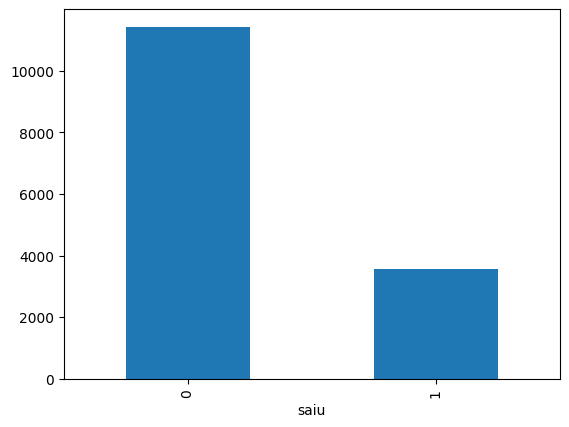

In [9]:
# O método plot() cria um gráfico de barras
base.saiu.value_counts().plot(kind='bar')

([<matplotlib.axis.XTick at 0x1e41ccff9e0>,
 [Text(0, 0, 'Não saiu'), Text(1, 0, 'Saiu')])

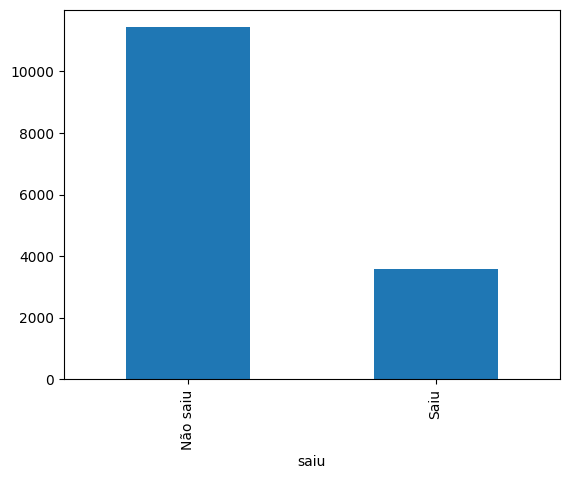

In [10]:
# O método plot() cria um gráfico de barras
# O parâmetro xticks() define os rótulos do eixo x
base.saiu.value_counts().plot(kind='bar')
plt.xticks((0, 1), ['Não saiu', 'Saiu'])

In [ ]:
# O método crosstab() cria uma tabela de contingência
# A tabela mostra a contagem de valores únicos na coluna 'departamento' e 'saiu'
pd.crosstab(base.departamento, base.saiu)

saiu,0,1
departamento,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [12]:
# O método crosstab() cria uma tabela de contingência
# A tabela mostra a contagem de valores únicos na coluna 'departamento' e 'saiu'
valores = pd.crosstab(base.departamento, base.saiu)

In [13]:
# O método sum() calcula a soma dos valores em cada linha
# A soma é armazenada na variável soma
soma  = valores.sum(axis=1)

In [14]:
# O método divide() divide os valores da tabela de contingência pela soma
# A operação de multiplicação * 100 converte a fração em porcentagem
# O resultado é uma tabela de porcentagens
valores.divide(soma, axis=0) * 100

saiu,0,1
departamento,,
IT,77.750611,22.249389
RandD,84.625159,15.374841
accounting,73.402868,26.597132
hr,70.906631,29.093369
management,85.555556,14.444444
marketing,76.340326,23.659674
product_mng,78.048780,21.951220
sales,75.507246,24.492754
support,75.100942,24.899058


In [15]:
# O método crosstab() cria uma tabela de contingência
# A tabela mostra a contagem de valores únicos na coluna 'departamento' e 'saiu'
pd.crosstab(base.salario, base.saiu)

saiu,0,1
salario,,
high,1155,82
low,5144,2172
medium,5129,1317


In [17]:
# O método crosstab() cria uma tabela de contingência
# A tabela mostra a contagem de valores únicos na coluna 'salario' e 'saiu'
# A tabela é armazenada na variável valores
valores_salario = pd.crosstab(base.salario, base.saiu)

In [18]:
# O método sum() calcula a soma dos valores em cada linha
# A soma é armazenada na variável soma_salario
soma_salario  = valores_salario.sum(axis=1)

In [19]:
# O método divide() divide os valores da tabela de contingência pela soma
# A operação de multiplicação * 100 converte a fração em porcentagem
# O resultado é uma tabela de porcentagens
valores_salario.divide(soma_salario, axis=0) * 100

saiu,0,1
salario,,
high,93.371059,6.628941
low,70.311646,29.688354
medium,79.568725,20.431275


In [20]:
# Criando uma tabela de porcentagens
# A tabela mostra a contagem de valores únicos na coluna 'salario' e 'saiu'
porc_salario = valores_salario.divide(soma_salario, axis=0) * 100

<Axes: xlabel='salario'>

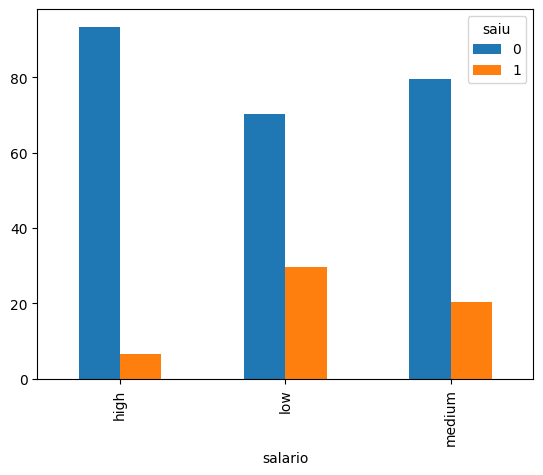

In [21]:
# O método plot() cria um gráfico de barras
porc_salario.plot(kind='bar')

<Axes: xlabel='salario'>

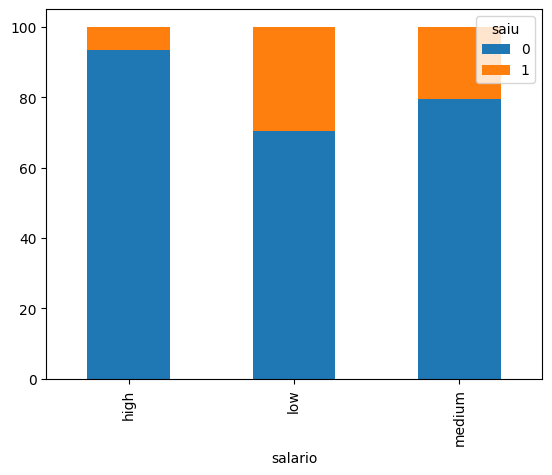

In [22]:
# O método plot() cria um gráfico de barras
# O parâmetro stacked=True empilha os valores
# O gráfico mostra a porcentagem de cada valor único na coluna 'salario' e 'saiu'
porc_salario.plot(kind='bar', stacked=True)

In [ ]:
# O método info() exibe informações sobre o DataFrame
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nivel_satisfacao    14978 non-null  float64
 1   ult_avaliacao       14999 non-null  float64
 2   num_projetos        14999 non-null  int64  
 3   media_horas_mes     14999 non-null  int64  
 4   tempo_empresa       14999 non-null  int64  
 5   aci_trabalho        14999 non-null  int64  
 6   saiu                14999 non-null  int64  
 7   promocao_ult_5anos  14999 non-null  int64  
 8   departamento        14999 non-null  object 
 9   salario             14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [24]:
# O método isnull() verifica se há valores nulos no DataFrame
base.isnull()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento,salario
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [25]:
# O método isnull() verifica se há valores nulos no DataFrame
# O método sum() calcula a soma dos valores nulos em cada coluna
# A soma é armazenada na variável nulos
base.isnull().sum()

nivel_satisfacao      21
ult_avaliacao          0
num_projetos           0
media_horas_mes        0
tempo_empresa          0
aci_trabalho           0
saiu                   0
promocao_ult_5anos     0
departamento           0
salario                0
dtype: int64

In [ ]:
# O método isnull() verifica se há valores nulos na coluna 'nivel_satisfacao'
base.nivel_satisfacao.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
14994    False
14995    False
14996    False
14997    False
14998    False
Name: nivel_satisfacao, Length: 14999, dtype: bool

In [27]:
# O método isnull() verifica se há valores nulos na coluna 'nivel_satisfacao'
# O método mean() calcula a média dos valores na coluna 'nivel_satisfacao'
base.loc[base.nivel_satisfacao.isnull(), 'nivel_satisfacao'] = \
base.nivel_satisfacao.mean()

In [28]:
# O método isnull() verifica se há valores nulos no DataFrame
# O método sum() calcula a soma dos valores nulos em cada coluna
base.isnull().sum()

nivel_satisfacao      0
ult_avaliacao         0
num_projetos          0
media_horas_mes       0
tempo_empresa         0
aci_trabalho          0
saiu                  0
promocao_ult_5anos    0
departamento          0
salario               0
dtype: int64

In [29]:
# Usando o método get_dummies() para criar variáveis dummy
# O método get_dummies() converte variáveis categóricas em variáveis dummy
# O parâmetro drop_first=True remove a primeira coluna dummy para evitar a armadilha da variável fictícia
# O resultado é um DataFrame com variáveis dummy
# O DataFrame original é substituído pelo DataFrame com variáveis dummy
base = pd.get_dummies(base, drop_first=True)

In [30]:
# O método head() retorna as 5 primeiras linhas do DataFrame
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


In [ ]:
# O método max() retorna o valor máximo das colunas
base.max()

nivel_satisfacao             1.0
ult_avaliacao                1.0
num_projetos                   7
media_horas_mes              310
tempo_empresa                 10
aci_trabalho                   1
saiu                           1
promocao_ult_5anos             1
departamento_RandD          True
departamento_accounting     True
departamento_hr             True
departamento_management     True
departamento_marketing      True
departamento_product_mng    True
departamento_sales          True
departamento_support        True
departamento_technical      True
salario_low                 True
salario_medium              True
dtype: object

In [32]:
# O método max() retorna o valor máximo das colunas
# O método min() retorna o valor mínimo das colunas
pd.DataFrame([base.max(), base.min()], index=['max', 'min'])

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
max,1.00,1.00,7,310,10,1,1,1,True,True,True,True,True,True,True,True,True,True,True
min,0.09,0.36,2,96,2,0,0,0,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# O método max() retorna o valor máximo das colunas
# O método min() retorna o valor mínimo das colunas
# O método T transposta o DataFrame
pd.DataFrame([base.max(), base.min()], index=['max', 'min']).T

,max,min
nivel_satisfacao,1.0,0.09
ult_avaliacao,1.0,0.36
num_projetos,7,2
media_horas_mes,310,96
tempo_empresa,10,2
aci_trabalho,1,0
saiu,1,0
promocao_ult_5anos,1,0
departamento_RandD,True,False
departamento_accounting,True,False


In [34]:
# Importando a biblioteca de pré-processamento do sklearn
from sklearn import preprocessing

In [ ]:
# Criando uma variável de pré-processamento
x = base.values

In [ ]:
# Imprimindo a variável de pré-processamento
x

array([[0.38, 0.53, 2, ..., False, True, False],
       [0.8, 0.86, 5, ..., False, False, True],
       [0.11, 0.88, 7, ..., False, False, True],
       ...,
       [0.37, 0.53, 2, ..., False, True, False],
       [0.11, 0.96, 6, ..., False, True, False],
       [0.37, 0.52, 2, ..., False, True, False]], dtype=object)

In [37]:
# Criando uma variável de pré-processamento
# O método MinMaxScaler() normaliza os dados entre 0 e 1
minmax = preprocessing.MinMaxScaler()

In [38]:
# Ajustando o modelo aos dados
# O método fit_transform() ajusta o modelo e transforma os dados
x_scaled = minmax.fit_transform(x)

In [ ]:
# Imprimindo os dados normalizados
x_scaled

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.25      , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [40]:
# O método DataFrame() cria um DataFrame a partir dos dados normalizados
# O parâmetro columns define os nomes das colunas
base = pd.DataFrame(x_scaled, columns=base.columns)

In [41]:
# O método head() retorna as 5 primeiras linhas do DataFrame
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# O método columns retorna os nomes das colunas do DataFrame
cols = list(base.columns)

In [ ]:
# O método columns retorna os nomes das colunas do DataFrame
cols

['nivel_satisfacao',
 'ult_avaliacao',
 'num_projetos',
 'media_horas_mes',
 'tempo_empresa',
 'aci_trabalho',
 'saiu',
 'promocao_ult_5anos',
 'departamento_RandD',
 'departamento_accounting',
 'departamento_hr',
 'departamento_management',
 'departamento_marketing',
 'departamento_product_mng',
 'departamento_sales',
 'departamento_support',
 'departamento_technical',
 'salario_low',
 'salario_medium']

In [ ]:
# O método remove() remove a coluna 'saiu' da lista de colunas
cols.remove('saiu')

In [ ]:
# O método columns retorna os nomes das colunas do DataFrame
cols

['nivel_satisfacao',
 'ult_avaliacao',
 'num_projetos',
 'media_horas_mes',
 'tempo_empresa',
 'aci_trabalho',
 'promocao_ult_5anos',
 'departamento_RandD',
 'departamento_accounting',
 'departamento_hr',
 'departamento_management',
 'departamento_marketing',
 'departamento_product_mng',
 'departamento_sales',
 'departamento_support',
 'departamento_technical',
 'salario_low',
 'salario_medium']

In [ ]:
# Armazenando os dados em uma variável
X = base[cols]

In [ ]:
# Armazenando os dados em uma variável
y = base["saiu"]

In [ ]:
# Importando a biblioteca
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Criando os modelos de classificação
# O método KNeighborsClassifier() cria um classificador KNN
knn = KNeighborsClassifier(n_neighbors=3)
tree = DecisionTreeClassifier()

In [ ]:
# Importando a biblioteca train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
# O método train_test_split() divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Imprimindo os dados de treinamento
X_train

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
10860,0.736264,0.906250,0.2,0.434579,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1613,0.362637,0.156250,0.0,0.238318,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11834,0.483516,1.000000,0.2,0.317757,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14714,0.373626,0.234375,0.0,0.275701,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5256,0.769231,0.609375,0.0,0.584112,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11666,0.978022,0.984375,0.4,0.771028,1.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7440,0.659341,0.437500,0.4,0.439252,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
14539,0.010989,0.765625,0.8,0.794393,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13598,0.373626,0.156250,0.0,0.420561,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [53]:
# O método shape retorna uma tupla com o número de linhas e colunas
# O método shape retorna o número de linhas e colunas do conjunto de treinamento e teste
print(X_train.shape, X_test.shape)

(11999, 18) (3000, 18)


In [54]:
# Importando a biblioteca
from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
# Treinando o modelo KNN
# O método fit() treina o modelo com os dados de treinamento
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fazendo previsões com o modelo KNN
# O método predict() faz previsões com os dados de teste
knn.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])

In [59]:
# Fazendo previsões com o modelo KNN
# O método predict() faz previsões com os dados de teste
predicted = knn.predict(X_test)

In [60]:
# O método accuracy_score() calcula a acurácia do modelo
# A acurácia é a proporção de previsões corretas em relação ao total de previsões
accuracy_score(predicted, y_test)

0.9533333333333334

In [ ]:
# O método confusion_matrix() calcula a matriz de confusão
# A matriz de confusão mostra o número de previsões corretas e incorretas
# A matriz de confusão é uma tabela que descreve o desempenho do modelo de classificação
confusion_matrix(predicted, y_test)

array([[2200,   50],
       [  90,  660]], dtype=int64)

In [ ]:
# Treinando o modelo de árvore de decisão
# O método fit() treina o modelo com os dados de treinamento
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Fazendo previsões com o modelo de árvore de decisão
# O método predict() faz previsões com os dados de teste
# O método accuracy_score() calcula a acurácia do modelo
accuracy_score(tree.predict(X_test), y_test)

0.9803333333333333

In [64]:
# Fazendo previsões com o modelo de árvore de decisão
# O método predict() faz previsões com os dados de teste
# O método confusion_matrix() calcula a matriz de confusão
confusion_matrix(tree.predict(X_test), y_test)

array([[2251,   20],
       [  39,  690]], dtype=int64)

In [65]:
# Importando a biblioteca
from sklearn.model_selection import cross_val_score

In [ ]:
# Fazendo validação cruzada com o modelo KNN
# O método cross_val_score() faz validação cruzada com o modelo KNN
# O parâmetro cv=5 define o número de divisões (folds) para a validação cruzada
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

In [ ]:
# Imprimindo os resultados da validação cruzada
scores

array([0.96666667, 0.931     , 0.93433333, 0.95733333, 0.95165055])

In [ ]:
# O método mean() calcula a média dos resultados da validação cruzada
scores.mean()

0.9481967767033457

In [ ]:
# O método std() calcula o desvio padrão dos resultados da validação cruzada
scores.std()

0.013597545694866528

In [ ]:
# Fazendo validação cruzada com o modelo de árvore de decisão
# O método cross_val_score() faz validação cruzada com o modelo de árvore de decisão
scores_tree = cross_val_score(tree, X, y, cv=5, scoring='accuracy')

In [ ]:
# Imprimindo os resultados da validação cruzada
scores_tree

array([0.97933333, 0.96333333, 0.97      , 0.99      , 0.97199066])

In [ ]:
# O método mean() calcula a média dos resultados da validação cruzada
scores_tree.mean()

0.974931466044237

In [ ]:
# O método std() calcula o desvio padrão dos resultados da validação cruzada
scores.std()

0.013597545694866528

In [ ]:
# O método feature_importances_ retorna a importância das variáveis
tree.feature_importances_

array([5.01143152e-01, 1.43601078e-01, 1.09121636e-01, 9.07017901e-02,
       1.32203554e-01, 2.68806219e-03, 3.28743686e-04, 5.67145002e-04,
       1.95061109e-04, 5.86755847e-04, 1.06782759e-03, 2.07322992e-04,
       8.16919459e-04, 3.21705188e-03, 2.88870200e-03, 3.63350582e-03,
       4.02161092e-03, 3.01008210e-03])

In [ ]:
# O método DataFrame() cria um DataFrame a partir da importância das variáveis
# O parâmetro index define os nomes das colunas
pd.DataFrame(tree.feature_importances_, index=cols)

,0
nivel_satisfacao,0.501143
ult_avaliacao,0.143601
num_projetos,0.109122
media_horas_mes,0.090702
tempo_empresa,0.132204
aci_trabalho,0.002688
promocao_ult_5anos,0.000329
departamento_RandD,0.000567
departamento_accounting,0.000195
departamento_hr,0.000587


In [ ]:
# O método DataFrame() cria um DataFrame a partir da importância das variáveis
# O parâmetro index define os nomes das colunas
pd.DataFrame(tree.feature_importances_, index=cols)[:5]

,0
nivel_satisfacao,0.501143
ult_avaliacao,0.143601
num_projetos,0.109122
media_horas_mes,0.090702
tempo_empresa,0.132204


<Axes: >

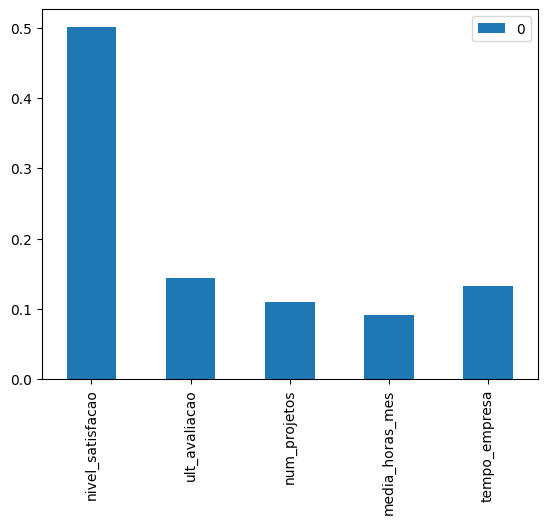

In [ ]:
# O método DataFrame() cria um DataFrame a partir da importância das variáveis
# O parâmetro index define os nomes das colunas
# O método plot() cria um gráfico de barras
# O parâmetro kind='bar' define o tipo de gráfico
pd.DataFrame(tree.feature_importances_, index=cols)[:5].plot(kind='bar')

In [78]:
# Importando a biblioteca
import pickle

In [79]:
# O método fit() treina o modelo com os dados de treinamento
tree.fit(X, y)

DecisionTreeClassifier()

In [80]:
# Salvando o modelo em um arquivo
# O método dump() salva o modelo em um arquivo
pickle.dump(tree, open('modelo_rh.pickle', 'wb'))

In [81]:
# Carregando o modelo do arquivo
# O método load() carrega o modelo do arquivo
tree_salva = pickle.load(open('modelo_rh.pickle', 'rb'))

In [ ]:
# Mostrando o modelo carregado
tree_salva

DecisionTreeClassifier()

In [ ]:
# Fazendo previsões com o modelo carregado
# O método predict() faz previsões com os dados de teste
tree_salva.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])